In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df= pdr.get_data_yahoo('AAPL', '2018-01-01', '2021-01-01')

df = df.dropna()
df = df[['Open', 'High', 'Low','Close']]
df

,Open,High,Low,Close
Date,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499
2018-01-04,43.134998,43.367500,43.020000,43.257500
2018-01-05,43.360001,43.842499,43.262501,43.750000
2018-01-08,43.587502,43.902500,43.482498,43.587502
...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001
2020-12-28,133.990005,137.339996,133.509995,136.690002
2020-12-29,138.050003,138.789993,134.339996,134.869995


In [3]:
# Predictor variables
df['Open-Close']= df.Open -df.Close
df['High-Low']  = df.High - df.Low
df =df.dropna()
X= df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2018-01-02,-0.524998,0.760002
2018-01-03,0.075001,0.647499
2018-01-04,-0.122501,0.347500
2018-01-05,-0.389999,0.579998
2018-01-08,0.000000,0.420002


In [4]:
# Target variable
Y= np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [5]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [12]:
# Instantiate KNN learning model(k=1
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.68
Test_data Accuracy: 0.52


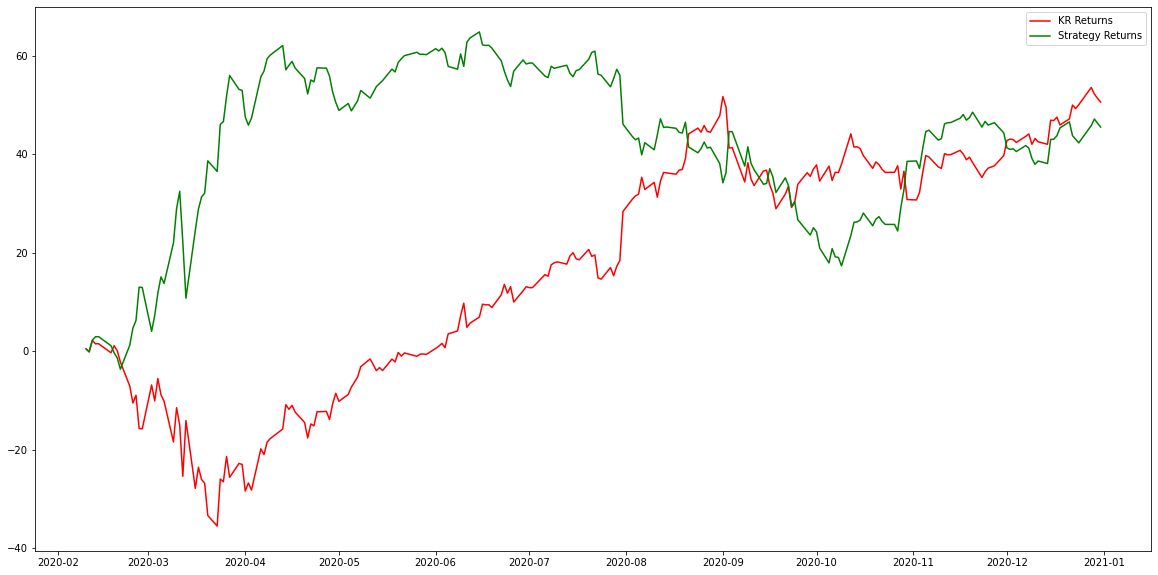

In [15]:
# Predicted Signal
df['Predicted_Signal'] = knn.predict(X)

# AAPL Cumulative Returns
df['AAPL_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_AAPL_returns = df[split:]['KR_returns'].cumsum()*100

# Cumulative Strategy Returns 
df['Startegy_returns'] = df['KR_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(20,10))
plt.plot(Cumulative_KR_returns, color='r',label = 'KR Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [16]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_KR_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 1.56


In [17]:
print(Cumulative_Strategy_returns.tail(1))
print(Cumulative_AAPL_returns.tail(1))

Date
2020-12-31    45.519665
Name: Startegy_returns, dtype: float64
Date
2020-12-31    50.589522
Name: KR_returns, dtype: float64
